## 1. Welcome to the world of data science
<p>Throughout the world of data science, there are many languages and tools that can be used to complete a given task. While you are often able to use whichever tool you prefer, it is often important for analysts to work with similar platforms so that they can share their code with one another. Learning what professionals in the data science industry use while at work can help you gain a better understanding of things that you may be asked to do in the future. </p>
<p>In this project, we are going to find out what tools and languages professionals use in their day-to-day work. Our data comes from the <a href="https://www.kaggle.com/kaggle/kaggle-survey-2017?utm_medium=partner&utm_source=datacamp.com&utm_campaign=ml+survey+case+study">Kaggle Data Science Survey</a> which includes responses from over 10,000 people that write code to analyze data in their daily work. </p>

In [92]:
# Load necessary packages
library(tidyverse)


# Load the data
responses <- read_csv("datasets/kagglesurvey.csv")

# Print the first 10 rows
responses  %>% glimpse(10)

Parsed with column specification:
cols(
  Respondent = col_double(),
  WorkToolsSelect = col_character(),
  LanguageRecommendationSelect = col_character(),
  EmployerIndustry = col_character(),
  WorkAlgorithmsSelect = col_character()
)


Rows: 10,153
Columns: 5
$ Respondent                   <dbl> ...
$ WorkToolsSelect              <chr> ...
$ LanguageRecommendationSelect <chr> ...
$ EmployerIndustry             <chr> ...
$ WorkAlgorithmsSelect         <chr> ...


## 2. Using multiple tools
<p>Now that we have loaded in the survey results, we want to focus on the tools and languages that the survey respondents use at work.</p>
<p>To get a better idea of how the data are formatted, we will look at the first respondent's tool-use and see that this survey-taker listed multiple tools that are each separated by a comma. To learn how many people use each tool, we need to separate out all of the tools used by each individual. There are several ways to complete this task, but we will use <code>str_split()</code> from <code>stringr</code> to separate the tools at each comma. Since that will create a list inside of the data frame, we can use the <code>tidyr</code> function <code>unnest()</code> to separate each list item into a new row.</p>

In [94]:
# Print the first respondent's tools and languages
# .... YOUR CODE FOR TASK 2 ....

# Add a new column, and unnest the new column
tools <- responses  %>% 
    mutate(work_tools = str_split(WorkToolsSelect,','))  %>% 
    unnest(work_tools)

# View the first 6 rows of tools
tools  %>% glimpse(6)

Rows: 47,409
Columns: 6
$ Respondent                   <dbl> ...
$ WorkToolsSelect              <chr> ...
$ LanguageRecommendationSelect <chr> ...
$ EmployerIndustry             <chr> ...
$ WorkAlgorithmsSelect         <chr> ...
$ work_tools                   <chr> ...


## 3. Counting users of each tool
<p>Now that we've split apart all of the tools used by each respondent, we can figure out which tools are the most popular.</p>

In [96]:
# Group the data by work_tools, summarise the counts, and arrange in descending order
tool_count <- tools  %>% 
    group_by(work_tools)  %>% 
    tally()  %>% arrange(-n) 
    
# Print the first 6 results
tool_count  %>% glimpse(6)

Rows: 50
Columns: 2
$ work_tools <chr> ...
$ n          <int> ...


## 4. Plotting the most popular tools
<p>Let's see how the most popular tools stack up against the rest.</p>

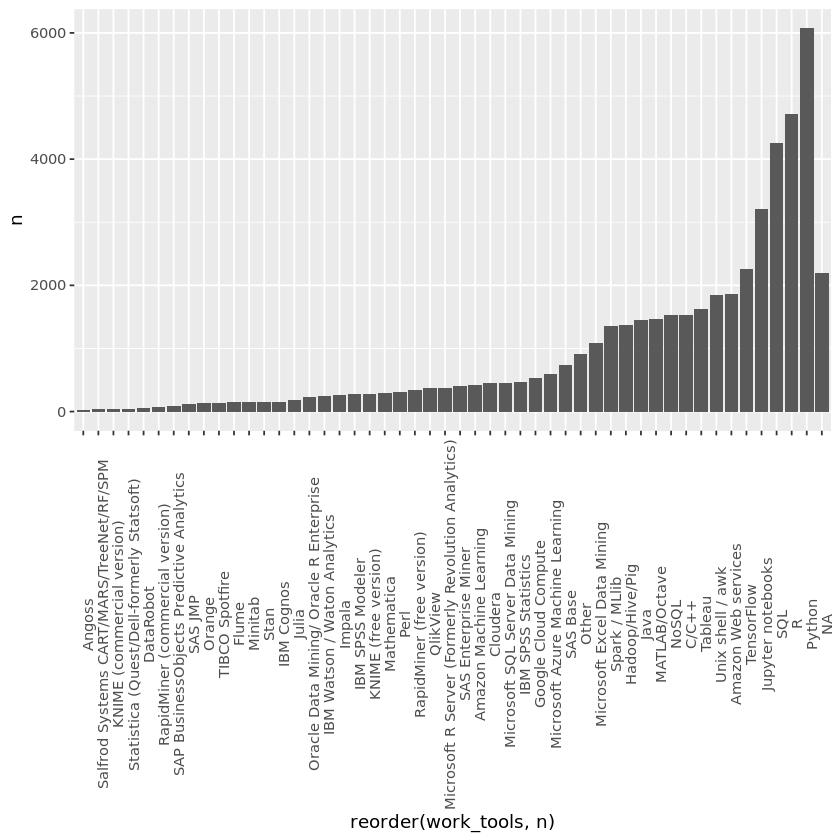

In [98]:
# Create a bar chart of the work_tools column, most counts on the far right
ggplot(tool_count, aes(reorder(work_tools, n), n)) + 
    geom_bar(stat = 'identity') +
    theme(axis.text.x = element_text(angle=90))

## 5. The R vs Python debate
<p>Within the field of data science, there is a lot of debate among professionals about whether R or Python should reign supreme. You can see from our last figure that R and Python are the two most commonly used languages, but it's possible that many respondents use both R and Python. Let's take a look at how many people use R, Python, and both tools.</p>

In [100]:
# Create a new column called language preference
debate_tools <- responses  %>% 
   mutate(language_preference = case_when(
       !grepl("Python",WorkToolsSelect) & grepl("R",WorkToolsSelect) ~ "R",
       grepl("Python",WorkToolsSelect) & !grepl("R",WorkToolsSelect) ~ "Python",
       grepl("Python",WorkToolsSelect) & grepl("R",WorkToolsSelect) ~ "both",
       !grepl("Python",WorkToolsSelect) & !grepl("R",WorkToolsSelect) ~ "neither",
       TRUE ~ as.character(WorkToolsSelect)
   ))

# Print the first 6 rows
debate_tools

Respondent,WorkToolsSelect,LanguageRecommendationSelect,EmployerIndustry,WorkAlgorithmsSelect,language_preference
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,"Amazon Web services,Oracle Data Mining/ Oracle R Enterprise,Perl",F#,Internet-based,"Neural Networks,Random Forests,RNNs",R
2,"Amazon Machine Learning,Amazon Web services,Cloudera,Hadoop/Hive/Pig,Impala,Java,Mathematica,MATLAB/Octave,Microsoft Excel Data Mining,Microsoft SQL Server Data Mining,NoSQL,Python,R,SAS Base,SAS JMP,SQL,Tableau",Python,Mix of fields,"Bayesian Techniques,Decision Trees,Random Forests,Regression/Logistic Regression",both
3,"C/C++,Jupyter notebooks,MATLAB/Octave,Python,R,TensorFlow",Python,Technology,"Bayesian Techniques,CNNs,Ensemble Methods,Neural Networks,Regression/Logistic Regression,SVMs",both
4,"Jupyter notebooks,Python,SQL,TensorFlow",Python,Academic,"Bayesian Techniques,CNNs,Decision Trees,Gradient Boosted Machines,Neural Networks,Random Forests,Regression/Logistic Regression",Python
5,"C/C++,Cloudera,Hadoop/Hive/Pig,Java,NoSQL,R,Unix shell / awk",R,Government,NA,R
6,SQL,Python,Non-profit,NA,neither
7,"Jupyter notebooks,NoSQL,Python,R,SQL,Unix shell / awk",Python,Internet-based,"CNNs,Decision Trees,Gradient Boosted Machines,Random Forests,Regression/Logistic Regression,SVMs",both
8,"Python,Spark / MLlib,Tableau,TensorFlow,Other",Python,Mix of fields,"Bayesian Techniques,CNNs,HMMs,Neural Networks,Random Forests,Regression/Logistic Regression,SVMs",Python
9,"Jupyter notebooks,MATLAB/Octave,Python,SAS Base,SQL",Python,Financial,"Ensemble Methods,Gradient Boosted Machines",Python


## 6. Plotting R vs Python users
<p>Now we just need to take a closer look at how many respondents use R, Python, and both!</p>

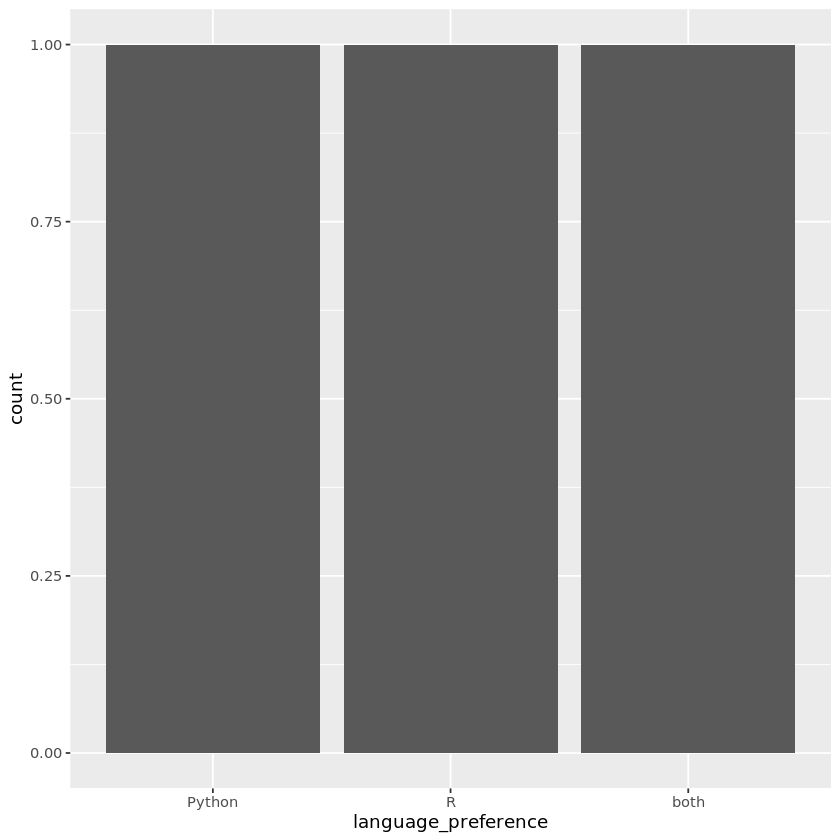

In [102]:
# Group by language preference, calculate number of responses, and remove "neither"
debate_plot <- debate_tools  %>% 
   group_by(language_preference)  %>% 
   # .... YOUR CODE FOR TASK 6 ....  %>% 
    filter(language_preference != 'neither')  %>% tally()

# Create a bar chart
ggplot(debate_plot, aes(language_preference)) + geom_bar()

## 7. Language recommendations
<p>It looks like the largest group of professionals program in both Python and R. But what happens when they are asked which language they recommend to new learners? Do R lovers always recommend R?</p>

In [104]:
# Group by, summarise, arrange, mutate, and filter
recommendations <- debate_tools  %>% 
    group_by(language_preference, LanguageRecommendationSelect)  %>% 
    summarise(count = n())  %>% 
    # .... YOUR CODE FOR TASK 7 ....
    arrange(-count)  %>% top_n(4)

`summarise()` regrouping output by 'language_preference' (override with `.groups` argument)
Selecting by count


## 8. The most recommended language by the language used
<p>Just one thing left. Let's graphically determine which languages are most recommended based on the language that a person uses.</p>

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'LanguageRecommedationSelect' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.de

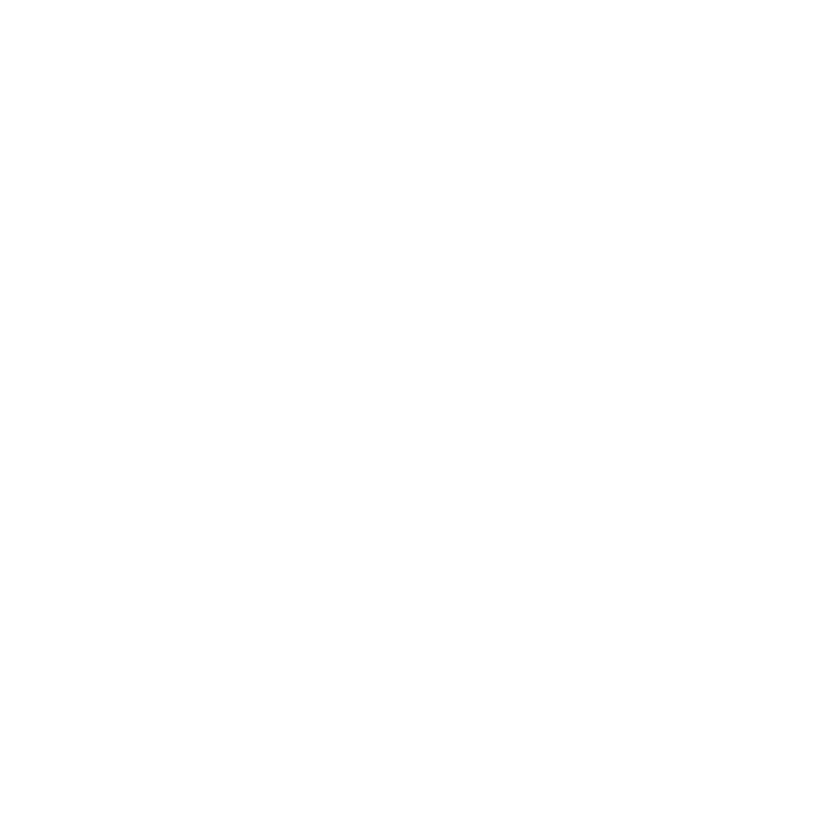

In [106]:
# Create a faceted bar plot
ggplot(recommendations, aes(LanguageRecommedationSelect, n)) +
    geom_bar(stat='identity')  + facet_wrap(~language_preference)

## 9. The moral of the story
<p>So we've made it to the end. We've found that Python is the most popular language used among Kaggle data scientists, but R users aren't far behind. And while Python users may highly recommend that new learners learn Python, would R users find the following statement <code>TRUE</code> or <code>FALSE</code>? </p>

In [108]:
# Would R users find this statement TRUE or FALSE?
R_is_number_one = ....

ERROR: Error in eval(expr, envir, enclos): object '....' not found
